Referencia para DataSet https://archive.ics.uci.edu/ml/datasets/Adult

In [1]:
#Biblioteca utilizadas 
import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn as sb


from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn import svm

from pandas import Series, DataFrame
from pylab import rcParams
from sklearn import preprocessing
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.cross_validation import train_test_split
from sklearn import metrics 
from sklearn.metrics import classification_report

from sklearn.metrics import confusion_matrix

/home/felipe/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


A extração foi feita por Barry Becker, do banco de dados do Censo de 1994. Um conjunto de registros razoavelmente limpos foi extraído usando as seguintes condições: ((AAGE> 16) && (AGI> 100) && (AFNLWGT> 1) && (HRSWK> 0))

Tarefa de predição é determinar se uma pessoa ganha mais de 50K por ano

Importando valores da Adult.csv pata amostragem e classificando.



In [13]:
data = pd.read_csv('Adult_test.csv', skiprows=[0], header=None, na_values=' ?', na_filter=True)
data.columns = ['age','workclass','fnlwgt','education','education-num','marital-status','occupation','relationship','race','sex','capital-gain','capital-loss', 'hours-per-week', 'native-country', 'target']
df= pd.DataFrame(data)

In [14]:
data.head(2000)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,target
0,25,Private,226802,11th,7.0,Never-married,Machine-op-inspct,Own-child,Black,Male,0.0,0.0,40.0,United-States,<=50K.
1,38,Private,89814,HS-grad,9.0,Married-civ-spouse,Farming-fishing,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12.0,Married-civ-spouse,Protective-serv,Husband,White,Male,0.0,0.0,40.0,United-States,>50K.
3,44,Private,160323,Some-college,10.0,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688.0,0.0,40.0,United-States,>50K.
4,18,NaN,103497,Some-college,10.0,Never-married,NaN,Own-child,White,Female,0.0,0.0,30.0,United-States,<=50K.
5,34,Private,198693,10th,6.0,Never-married,Other-service,Not-in-family,White,Male,0.0,0.0,30.0,United-States,<=50K.
6,29,NaN,227026,HS-grad,9.0,Never-married,NaN,Unmarried,Black,Male,0.0,0.0,40.0,United-States,<=50K.
7,63,Self-emp-not-inc,104626,Prof-school,15.0,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103.0,0.0,32.0,United-States,>50K.
8,24,Private,369667,Some-college,10.0,Never-married,Other-service,Unmarried,White,Female,0.0,0.0,40.0,United-States,<=50K.
9,55,Private,104996,7th-8th,4.0,Married-civ-spouse,Craft-repair,Husband,White,Male,0.0,0.0,10.0,United-States,<=50K.


In [4]:
df.occupation.replace(0, np.nan, inplace=True)

In [5]:
print(df.shape)
df=df.dropna()
print(df.shape)

(6525, 15)
(6023, 15)


In [6]:
df.head(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,target
0,25,Private,226802,11th,7.0,Never-married,Machine-op-inspct,Own-child,Black,Male,0.0,0.0,40.0,United-States,<=50K.
1,38,Private,89814,HS-grad,9.0,Married-civ-spouse,Farming-fishing,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12.0,Married-civ-spouse,Protective-serv,Husband,White,Male,0.0,0.0,40.0,United-States,>50K.
3,44,Private,160323,Some-college,10.0,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688.0,0.0,40.0,United-States,>50K.
5,34,Private,198693,10th,6.0,Never-married,Other-service,Not-in-family,White,Male,0.0,0.0,30.0,United-States,<=50K.
7,63,Self-emp-not-inc,104626,Prof-school,15.0,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103.0,0.0,32.0,United-States,>50K.
8,24,Private,369667,Some-college,10.0,Never-married,Other-service,Unmarried,White,Female,0.0,0.0,40.0,United-States,<=50K.
9,55,Private,104996,7th-8th,4.0,Married-civ-spouse,Craft-repair,Husband,White,Male,0.0,0.0,10.0,United-States,<=50K.
10,65,Private,184454,HS-grad,9.0,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,6418.0,0.0,40.0,United-States,>50K.
11,36,Federal-gov,212465,Bachelors,13.0,Married-civ-spouse,Adm-clerical,Husband,White,Male,0.0,0.0,40.0,United-States,<=50K.


Validando independencia entre as variáveis

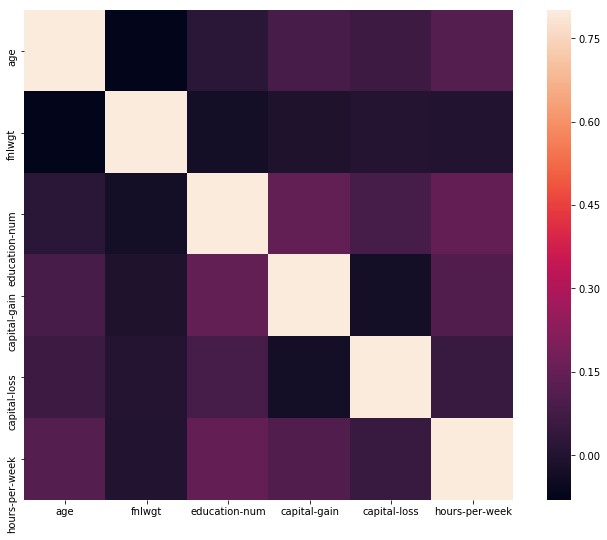

In [7]:
hmap = df.corr()
plt.subplots(figsize=(12, 9))
sns.heatmap(hmap, vmax=.8, square=True);

Incluir apenas os atributos correlacionados com o atributo (target). por nao usar um grafico para fazer um comparativo.

In [8]:
df.drop(['workclass', 'fnlwgt', 'education', 'marital-status', 'occupation', 'relationship', 'sex', 'race', 'capital-loss', 'native-country'],axis=1,inplace=True)
df.head()

,age,education-num,capital-gain,hours-per-week,target
0,25,7.0,0.0,40.0,<=50K.
1,38,9.0,0.0,50.0,<=50K.
2,28,12.0,0.0,40.0,>50K.
3,44,10.0,7688.0,40.0,>50K.
5,34,6.0,0.0,30.0,<=50K.


Fazendo os treinamento com atributos correlacionados com o atributo target

In [9]:
X=df[['education-num','age','hours-per-week', 'capital-gain']].values
y= df[['target']].values

X_train, X_test, y_train, y_test = train_test_split(X ,y, test_size=0.3, random_state=25)

Configurando os modelo de previsão.

Decission Trees

In [10]:
#Tree

Classif_Tree = tree.DecisionTreeClassifier()
Classif_Tree.fit(X_train, y_train)
y_pred = Classif_Tree.predict(X_train)

print(classification_report(y_train, y_pred))

clf = tree.DecisionTreeClassifier()
clf.fit(X_train, y_train)
predn=clf.predict(X_test)
print('accuracy', metrics.accuracy_score(predn,y_test))



             precision    recall  f1-score   support

     <=50K.       0.90      0.99      0.94      3159
      >50K.       0.95      0.67      0.79      1057

avg / total       0.91      0.91      0.90      4216

accuracy 0.770890979524073


KNN

In [11]:
#KNN
Classif_KNN = KNeighborsClassifier()
Classif_KNN.fit(X_train, y_train)
y_pred = Classif_KNN.predict(X_train)

print(classification_report(y_train, y_pred))

model=KNeighborsClassifier(n_neighbors=78) 
model.fit(X_train,y_train)
prediction=model.predict(X_test)

print('accuracy', metrics.accuracy_score(prediction,y_test))

             precision    recall  f1-score   support

     <=50K.       0.87      0.93      0.90      3159
      >50K.       0.75      0.60      0.66      1057

avg / total       0.84      0.85      0.84      4216

accuracy 0.8101826231322634


/home/felipe/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until
/home/felipe/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  if __name__ == '__main__':


Regre Logistica

In [12]:
Classif_RL = LogisticRegression()
Classif_RL.fit(X_train, y_train)
y_pred = Classif_RL.predict(X_train)

print(classification_report(y_train, y_pred))

clf = LogisticRegression()
clf.fit(X_train, y_train)
predn=clf.predict(X_test)
print('accuracy', metrics.accuracy_score(predn,y_test))

             precision    recall  f1-score   support

     <=50K.       0.81      0.96      0.88      3159
      >50K.       0.72      0.33      0.46      1057

avg / total       0.79      0.80      0.77      4216

accuracy 0.8063087991145546


/home/felipe/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Setting up a Support Vector Machine (Demora muito pra pocessar)